<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#ride_ids-Table" data-toc-modified-id="ride_ids-Table-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ride_ids Table</a></span><ul class="toc-item"><li><span><a href="#Ride-Distances" data-toc-modified-id="Ride-Distances-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Ride Distances</a></span></li><li><span><a href="#Ride-Durations" data-toc-modified-id="Ride-Durations-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Ride Durations</a></span></li><li><span><a href="#Ride-Prime-Time" data-toc-modified-id="Ride-Prime-Time-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Ride Prime Time</a></span></li></ul></li><li><span><a href="#drivers" data-toc-modified-id="drivers-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>drivers</a></span></li><li><span><a href="#Timestamps" data-toc-modified-id="Timestamps-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Timestamps</a></span><ul class="toc-item"><li><span><a href="#Check-proportion-of-completed-customer-funnel" data-toc-modified-id="Check-proportion-of-completed-customer-funnel-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Check proportion of completed customer funnel</a></span></li></ul></li><li><span><a href="#Drivers-with-the-most-amount-of-completed-rides" data-toc-modified-id="Drivers-with-the-most-amount-of-completed-rides-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Drivers with the most amount of completed rides</a></span></li></ul></li></ul></div>

In [134]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kiwi_ridesharing.data import Kiwi

# EDA

In this section i will conduct a short EDA in order to get a better understanding of the data I'm working with.
I will check: 
- Missing values
- Duplicates
- Data distribution
- Correlations
- Measures of Central tendency and dispersion

In [136]:
# let's start by loading in our data dictionary
data = Kiwi().get_data()

## ride_ids Table

In [137]:
rides_df = data["rides"]
rides_df.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [138]:
rides_df.describe()

,ride_distance,ride_duration,ride_prime_time
count,193502.000000,193502.000000,193502.000000
mean,6955.218266,858.966099,17.305893
std,8929.444606,571.375818,30.825800
min,-2.000000,2.000000,0.000000
25%,2459.000000,491.000000,0.000000
50%,4015.000000,727.000000,0.000000
75%,7193.000000,1069.000000,25.000000
max,724679.000000,28204.000000,500.000000


In [139]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193502 entries, 0 to 193501
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   driver_id        193502 non-null  object
 1   ride_id          193502 non-null  object
 2   ride_distance    193502 non-null  int64 
 3   ride_duration    193502 non-null  int64 
 4   ride_prime_time  193502 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.4+ MB


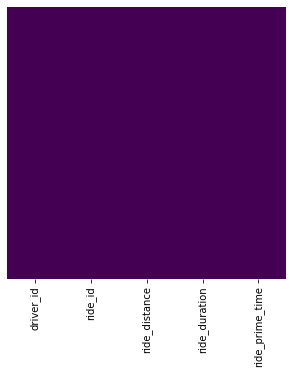

In [140]:
# check for numissing values
plt.figure(figsize=(5, 5))
sns.heatmap(rides_df.isnull(),
        yticklabels=False,
        cbar=False,
        cmap='viridis')
plt.show()

Rides dataset has no missing values

### Ride Distances

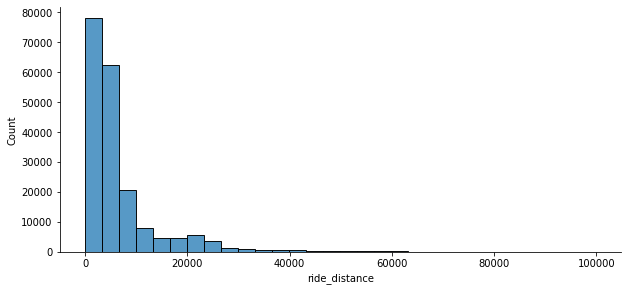

In [141]:
# distribution of ride distances
sns.displot(data=rides_df[rides_df['ride_distance'] < 100000], x='ride_distance', bins=30, )
plt.gcf().set_size_inches(10, 4)

We can see that distances could reach up to 700km. I checked with similar ridesharing Apps such as Uber and it seems that there is no limit on the distance of a trip. 

This trip could be a cross country trip, like in the example below. 

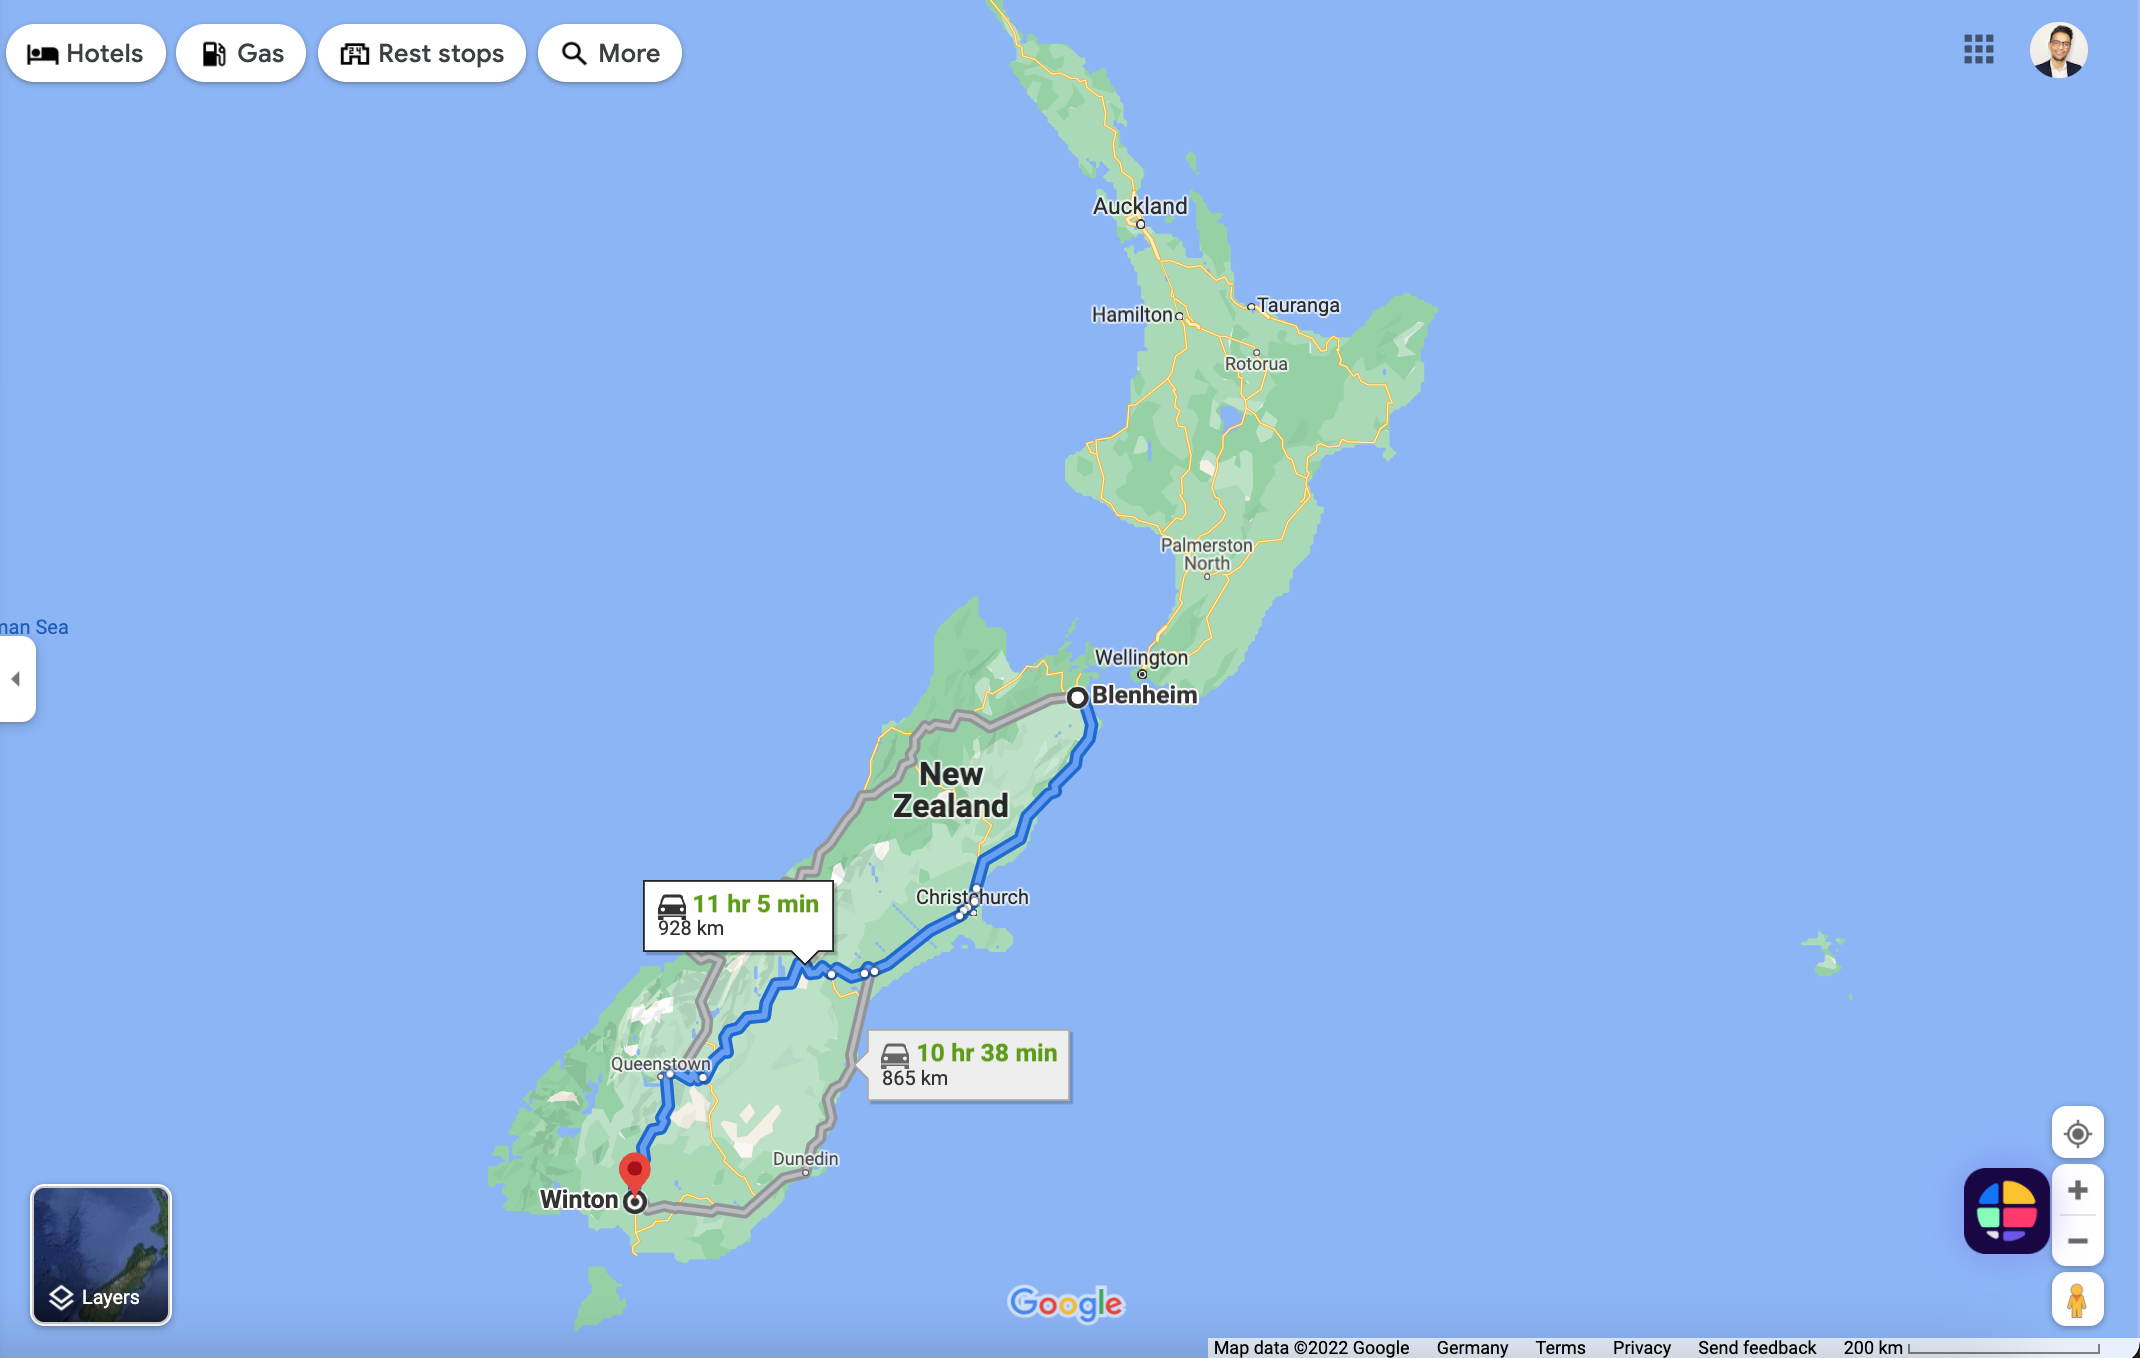

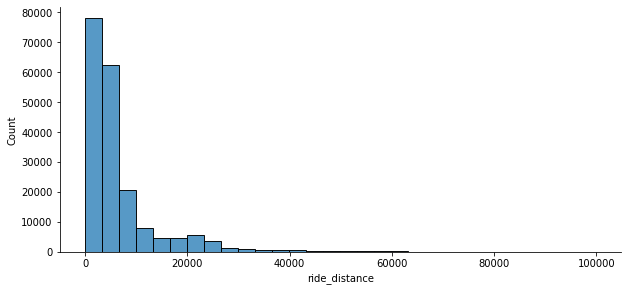

In [142]:
# distribution of ride distances - only distances < 100_000 meters
sns.displot(data=rides_df[rides_df['ride_distance'] < 100000], x='ride_distance', bins=30, )
plt.gcf().set_size_inches(10, 4)

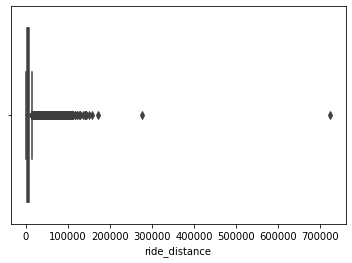

In [143]:
sns.boxplot(x=rides_df["ride_distance"]);

From the above plots we could see the data is highly positively skewed due to extreme outliers - These outliers must be investigated and validated

In [144]:
# check ride duration and compare to ride distance
rides_df["duration_minutes"] = round(rides_df["ride_duration"]/60, 2)
rides_df["duration_hours"] = round(rides_df["duration_minutes"]/60, 2)
rides_df["average_speed"] = round(rides_df["ride_distance"]/1000, 2)/rides_df["duration_hours"]
rides_df.sort_values(by="ride_distance", ascending=False)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,duration_minutes,duration_hours,average_speed
1921,02d6a6b8a6da15fc219a9570f7ebbe78,e7f8524051edb7b28e86391f6461bc03,724679,28204,0,470.07,7.83,92.551724
148556,b9926f42a5fd6cc0c455fe59a21961ab,c4c284d0e1ff48d2c75b60555bfba409,276229,11294,0,188.23,3.14,87.971338
94650,7419cd5c573ff9994c0f8ff5d92b4408,492fc57131472959769e13bc8ad9fa72,172430,7765,0,129.42,2.16,79.828704
173387,e0e3594e7d43742458a79799c7a5dd6c,9dda88054abf2e7a32d3727aef662a7f,156382,19829,50,330.48,5.51,28.381125
147442,b7de2b55859abf8fb49bf393a5a2816a,f44822cf4ff8fd673720f76d5d6487d0,150568,9119,0,151.98,2.53,59.513834
...,...,...,...,...,...,...,...,...
45033,39a7bc235caf53556b15dd28ab5a7157,ba7aac6b64b1ee8b8e3b1fa73543e219,0,6,0,0.10,0.00,NaN
136872,abc63585621a8cc49099bc9dde677f27,8ce13284bdd9c58ceb9feb6f18de4a79,0,506,75,8.43,0.14,0.000000
165088,d500e63eb4adbab2fb34140565ae4d20,a2da313596834a90893a48a8c34544ae,0,11,25,0.18,0.00,NaN
165017,d500e63eb4adbab2fb34140565ae4d20,4efa49f674b7354321145358f66dd1a1,0,63,0,1.05,0.02,0.000000


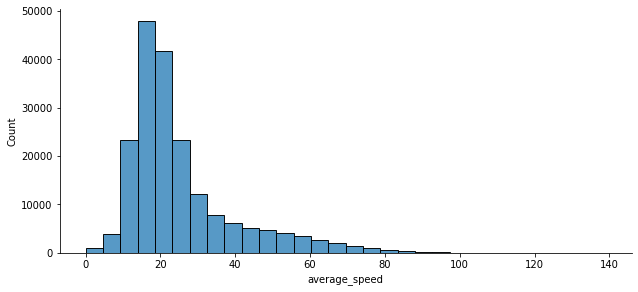

In [145]:
# distribution of speed
sns.displot(data=rides_df, x='average_speed', bins=30, )
plt.gcf().set_size_inches(10, 4)

In [146]:
# check negative distances
rides_df[rides_df["ride_distance"] < 0]

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,duration_minutes,duration_hours,average_speed
68704,569271b82c506166a23ffcfbf6f854f2,ff1ca66337a18055f1c70c7645399972,-2,181,50,3.02,0.05,-0.0


Basically, we can consider all ride distances as valid since a customer could book a car but never show up, or change their minds after getting into the car. These scenarios are still considered as a ride since the customer already booked and must pay the minimum fee of 5$ anyway.

In the case of this one negative distance, we could choose to either drop the entire row, since it is clearly a data entry error. I will chose to drop it for now but will return to it when investigating the other table.

In any case, the database should be updated so that only positive integers are accepted in the ride_distance column. 

### Ride Durations

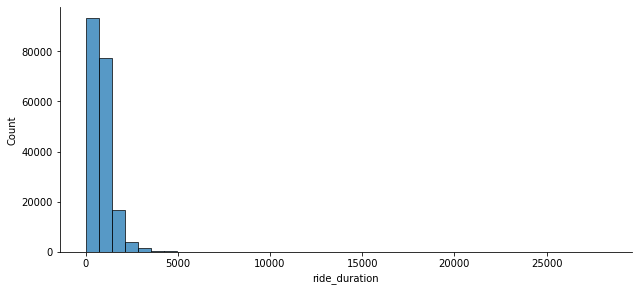

In [147]:
sns.displot(data=rides_df, x='ride_duration', bins=40, )
plt.gcf().set_size_inches(10, 4)

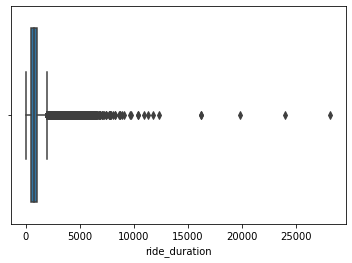

In [148]:
sns.boxplot(x=rides_df["ride_duration"]);

### Ride Prime Time

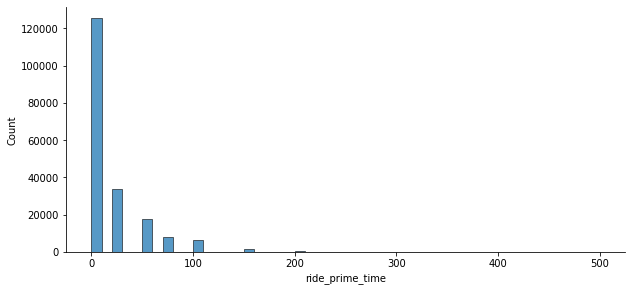

In [149]:
sns.displot(data=rides_df, x='ride_prime_time', bins=50, )
plt.gcf().set_size_inches(10, 4)

In [150]:
rides_df["ride_prime_time"].value_counts()

0      125412
25      33677
50      17712
75       8208
100      6216
150      1686
200       432
250       101
300        31
350        15
400        11
500         1
Name: ride_prime_time, dtype: int64

## drivers

In [151]:
drivers_df = data["drivers"]
drivers_df.head()

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00


In [152]:
drivers_df.describe()

,driver_id,driver_onboard_date
count,937,937
unique,937,49
top,002be0ffdc997bd5c50703158b7c2491,2016-04-05 00:00:00
freq,1,36


Check the number of onboared divers

In [153]:
drivers_df['driver_id'].nunique()

937

In [154]:
## Turn driver_onboard_date column to datetime

drivers_df["driver_onboard_date"] = pd.to_datetime(drivers_df["driver_onboard_date"], format="%Y-%m-%d %H:%M:%S")

In [155]:
first_onboarding = drivers_df["driver_onboard_date"].min()

In [156]:
last_onboarding = drivers_df["driver_onboard_date"].max()

In [157]:
print(f"from {first_onboarding.date()} to {last_onboarding.date()} Kiwi has onboarded {drivers_df['driver_id'].nunique()} drivers")

from 2016-03-28 to 2016-05-15 Kiwi has onboarded 937 drivers


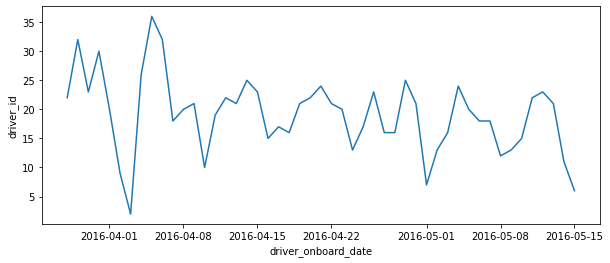

In [158]:
# count new on boardings per day
onboarding_per_day = drivers_df.groupby("driver_onboard_date").count()
sns.lineplot(x=onboarding_per_day.index, y=onboarding_per_day["driver_id"])
plt.gcf().set_size_inches(10, 4)

In [159]:
# day with least number of new onboardings
onboarding_per_day["driver_id"].sort_values().head(1)

driver_onboard_date
2016-04-03    2
Name: driver_id, dtype: int64

In [160]:
# day with most number of new onboardings
onboarding_per_day["driver_id"].sort_values(ascending=False).head(1)

driver_onboard_date
2016-04-05    36
Name: driver_id, dtype: int64

## Timestamps

In [161]:
timestamp_df = data["timestamps"]
timestamp_df.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


In [162]:
timestamp_df.describe()

,ride_id,event,timestamp
count,970405,970405,970404
unique,194081,5,865826
top,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-04-30 22:09:15
freq,5,194081,7


In [197]:
# convert timestamp column to datetime
timestamp_df["timestamp"] = pd.to_datetime(timestamp_df["timestamp"])

In [198]:
# check missing values
timestamp_df.isnull().sum()

ride_id      0
event        0
timestamp    1
dtype: int64

In [199]:
timestamp_df[timestamp_df["timestamp"].isnull()]

,ride_id,event,timestamp
434222,72f0fa0bd86800e9da5c4dced32c8735,arrived_at,NaT


In [200]:
timestamp_df[timestamp_df["ride_id"] == "72f0fa0bd86800e9da5c4dced32c8735"]

,ride_id,event,timestamp
434220,72f0fa0bd86800e9da5c4dced32c8735,requested_at,2016-04-20 11:56:50
434221,72f0fa0bd86800e9da5c4dced32c8735,accepted_at,2016-04-20 11:57:20
434222,72f0fa0bd86800e9da5c4dced32c8735,arrived_at,NaT
434223,72f0fa0bd86800e9da5c4dced32c8735,picked_up_at,2016-04-20 12:02:20
434224,72f0fa0bd86800e9da5c4dced32c8735,dropped_off_at,2016-04-20 12:16:30


There is one missing value in the timestamp column which corresponds to when the driver arrived at the pickup location. We have two option:

- Drop this row
- Impute the value

### Check proportion of completed customer funnel

The customer funnel in this case is:
- customer requests ride -> driver accepts ride -> driver arrives at pickup -> customer is picked up -> customer is dropped off

In [201]:
timestamp_df.groupby("event").count()/timestamp_df["ride_id"].nunique()

,ride_id,timestamp
event,,
accepted_at,1.0,1.000000
arrived_at,1.0,0.999995
dropped_off_at,1.0,1.000000
picked_up_at,1.0,1.000000
requested_at,1.0,1.000000


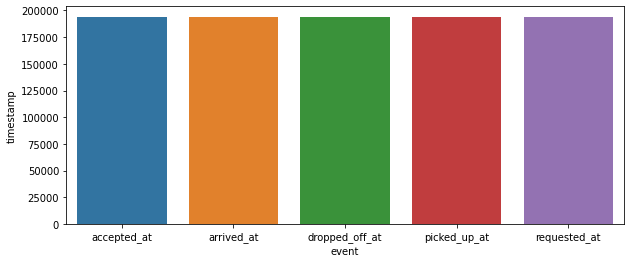

In [202]:
sns.barplot(x=timestamp_df.groupby("event").count().index ,
            y=timestamp_df.groupby("event").count()["timestamp"]);
plt.gcf().set_size_inches(10, 4)

It seems that all our data points represent a complete customer funnel.

In [203]:
len(timestamp_df["timestamp"].unique())

865827

In [205]:
# last ride in database
timestamp_df["timestamp"].max()

Timestamp('2016-06-27 00:50:50')

In [206]:
# first ride in database
timestamp_df["timestamp"].min()

Timestamp('2016-03-28 05:48:18')

## Drivers with the most amount of completed rides
You have to join with the driver table

In [186]:
frequent_drivers = timestamp_df[timestamp_df["event"] == "dropped_off_at"]

In [187]:
frequent_drivers = frequent_drivers.merge(rides_df, on="ride_id", how="left")

In [188]:
frequent_drivers = frequent_drivers.groupby("driver_id").count()

In [189]:
frequent_drivers

,ride_id,event,timestamp,ride_distance,ride_duration,ride_prime_time,duration_minutes,duration_hours,average_speed
driver_id,,,,,,,,,
002be0ffdc997bd5c50703158b7c2491,277,277,277,277,277,277,277,277,277
007f0389f9c7b03ef97098422f902e62,31,31,31,31,31,31,31,31,31
011e5c5dfc5c2c92501b8b24d47509bc,34,34,34,34,34,34,34,34,34
0152a2f305e71d26cc964f8d4411add9,191,191,191,191,191,191,191,191,191
01674381af7edd264113d4e6ed55ecda,375,375,375,375,375,375,375,375,375
...,...,...,...,...,...,...,...,...,...
ff419a3476e21e269e340b5f1f05414e,242,242,242,242,242,242,242,242,241
ff714a67ba8c6a108261cd81e3b77f3a,485,485,485,485,485,485,485,485,485
fff482c704d36a1afe8b8978d5486283,35,35,35,35,35,35,35,35,35


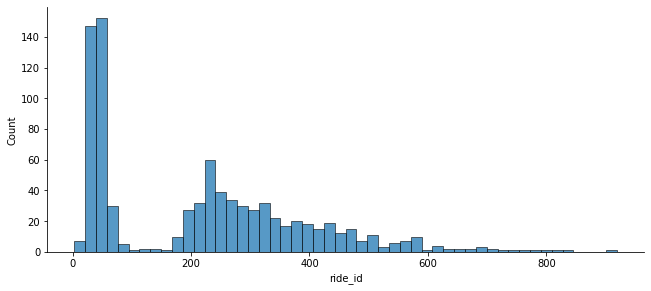

In [190]:
sns.displot(data=frequent_drivers, x='ride_id', bins=50, )
plt.gcf().set_size_inches(10, 4)